# Visualization and processing of Netflix dataset

*Import some libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Read initial data*

In [2]:
data = pd.read_csv('netflix_titles.csv', index_col = 0)

In [3]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,puntuation,poster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,7.3,https://image.tmdb.org/t/p/original/wCQP1El20F...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.3,https://image.tmdb.org/t/p/original/8QxTx4IouJ...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6,https://image.tmdb.org/t/p/original/sQGBK2mvw3...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",7.4,https://image.tmdb.org/t/p/original/tuGlQkqLxn...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,6.7,https://image.tmdb.org/t/p/original/efG8Po57al...


*Visualizations:*

Text(0, 0.5, 'Nº of items')

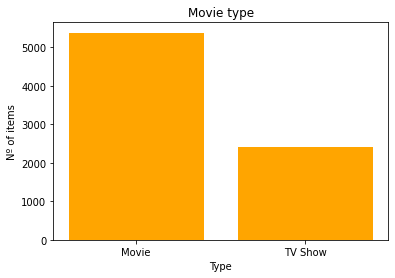

In [4]:
#Plot for type
aux1 = (data[['type', 'duration']].groupby('type').count())
plt.bar(aux1.index, aux1['duration'], color = 'orange')
plt.title('Movie type')
plt.xlabel('Type')
plt.ylabel('Nº of items')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

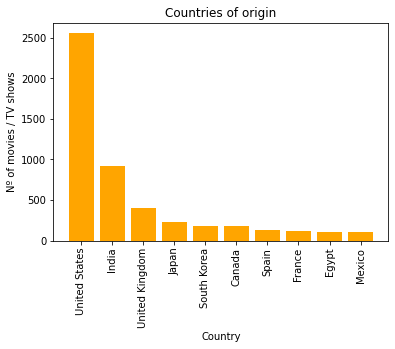

In [5]:
#Plot for countries
aux2 = (data[['country', 'duration']].groupby('country').count())
aux2 = aux2.sort_values(by = 'duration', ascending = False)
plt.bar(aux2.index[0:10], aux2['duration'].head(10), color = 'orange')
plt.title('Countries of origin')
plt.xlabel('Country')
plt.ylabel('Nº of movies / TV shows')
plt.xticks(rotation = 'vertical')

Text(0, 0.5, 'Nº of movies / TV shows')

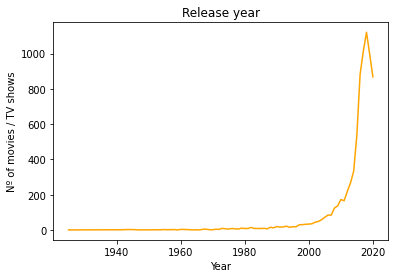

In [6]:
#Plot for release_year
aux3 = (data[['release_year', 'duration']].groupby('release_year').count())
aux3 = aux3.sort_values(by = 'release_year', ascending = True)
aux3 = aux3.drop(aux3.tail(1).index)
plt.plot(aux3.index, aux3['duration'], color = 'orange')
plt.title('Release year')
plt.xlabel('Year')
plt.ylabel('Nº of movies / TV shows')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

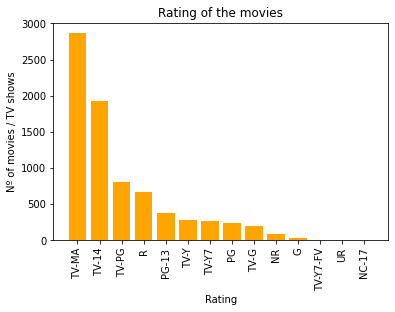

In [7]:
#Plot for rating
aux4 = (data[['rating', 'duration']].groupby('rating').count())
aux4 = aux4.sort_values(by = 'duration', ascending = False)
plt.bar(aux4.index, aux4['duration'], color = 'orange')
plt.title('Rating of the movies')
plt.xlabel('Rating')
plt.ylabel('Nº of movies / TV shows')
plt.xticks(rotation = 'vertical')

([<matplotlib.axis.YTick at 0x24fae76c520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

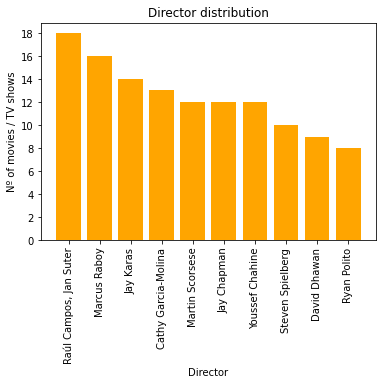

In [8]:
#Plot for director
aux5 = (data[['director', 'duration']].groupby('director').count())
aux5 = aux5.sort_values(by = 'duration', ascending = False)
plt.bar(aux5.index[0:10], aux5['duration'].head(10), color = 'orange')
plt.title('Director distribution')
plt.xlabel('Director')
plt.ylabel('Nº of movies / TV shows')
plt.xticks(rotation = 'vertical')
plt.yticks(np.arange(0, 19, 2))

*Following code to get extra data about movies. We get the puntuation and the poster from The Movie Database API*

In [9]:
import json
import pymongo
import pandas as pd
import requests
from tqdm import tqdm

In [10]:
http_movie = 'https://api.themoviedb.org/3/search/movie?api_key='
http_tv = 'https://api.themoviedb.org/3/search/tv?api_key='

#read the api_key from the file
api_key = '4ef4a50085e3aa71d81051ff43be51ea'

In [11]:
#Create variables for the puntuation and poster
data[['poster']] = 'no_path'
data[['puntuation']] = 0

#Search for all the movies selected this variables with the API
for i in tqdm(range(len(data[['title']]))):
    if data.iloc[i, 1] == 'Movie':
        a = (requests.get(str(http_movie + api_key), params = {'language' : 'us-US', 'query' : data.iloc[i, 2], 'include_adult' : True})).json()
    else:
        a = (requests.get(str(http_tv + api_key), params = {'language' : 'us-US', 'query' : data.iloc[i, 2], 'include_adult' : True})).json()
  
    if len(a['results']) > 0:
        data.loc[i, 'puntuation'] = a['results'][0]['vote_average']
        data.loc[i, 'poster'] = str('https://image.tmdb.org/t/p/original' + str(a['results'][0]['poster_path']))

100%|██████████████████████████████████████████████████████████████████████████████| 7787/7787 [43:01<00:00,  3.02it/s]


*Save new data*

In [12]:
data.to_csv('netflix_titles.csv')